# 1- Dealing with Outliers==> hale moshkele dade haye part

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import Ames House Dataset
df= pd.read_csv(r"E:\my courses\courses\mine\ai\Machine Learning\machine learning\datasets\preprocess\Housing_Data.csv")

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [5]:
df.shape

(2930, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [7]:
df.corr()

ValueError: could not convert string to float: 'RL'

In [78]:
# شناسایی ستون‌های عددی
numeric_df = df.select_dtypes(include=[np.number])

# محاسبه همبستگی بین ستون‌های عددی
correlation_matrix = numeric_df.corr()

# نمایش ماتریس همبستگی
correlation_matrix


,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,1.000000,-0.001581,-0.096699,0.034949,-0.262742,0.104544,-0.343598,-0.157865,-0.225374,-0.098455,...,-0.051401,-0.070842,0.161911,-0.024829,-0.025540,-0.002801,-0.008199,-0.049904,0.009738,-0.246428
MS SubClass,-0.001581,1.000000,-0.420164,-0.204603,0.039648,-0.067306,0.036559,0.043143,0.003794,-0.059628,...,-0.017385,-0.014627,-0.023135,-0.037929,-0.050538,-0.003417,-0.029231,0.000552,-0.017876,-0.085031
Lot Frontage,-0.096699,-0.420164,1.000000,0.491351,0.211917,-0.074299,0.121085,0.091915,0.220366,0.215213,...,0.120346,0.162908,0.013797,0.028542,0.076602,0.173954,0.044458,0.010721,-0.007760,0.357272
Lot Area,0.034949,-0.204603,0.491351,1.000000,0.097158,-0.034752,0.023219,0.021741,0.125928,0.191719,...,0.157255,0.103732,0.022034,0.016237,0.055027,0.093772,0.069183,0.003796,-0.023112,0.266537
Overall Qual,-0.262742,0.039648,0.211917,0.097158,1.000000,-0.094868,0.597424,0.570367,0.422922,0.284369,...,0.255914,0.298151,-0.139885,0.018189,0.041473,0.030372,0.005133,0.030685,-0.020842,0.799306
Overall Cond,0.104544,-0.067306,-0.074299,-0.034752,-0.094868,1.000000,-0.368630,0.047791,-0.132518,-0.051553,...,0.020270,-0.068978,0.071114,0.043851,0.044048,-0.016791,0.034055,-0.007216,0.031319,-0.101686
Year Built,-0.343598,0.036559,0.121085,0.023219,0.597424,-0.368630,1.000000,0.612636,0.306946,0.280809,...,0.229459,0.198421,-0.373424,0.015798,-0.041509,0.002204,-0.011032,0.014119,-0.013597,0.558672
Year Remod/Add,-0.157865,0.043143,0.091915,0.021741,0.570367,0.047791,0.612636,1.000000,0.192164,0.152616,...,0.217763,0.242291,-0.221358,0.037487,-0.046728,-0.011375,-0.003078,0.018511,0.032749,0.533295
Mas Vnr Area,-0.225374,0.003794,0.220366,0.125928,0.422922,-0.132518,0.306946,0.192164,1.000000,0.299892,...,0.166037,0.139769,-0.109591,0.014184,0.066715,0.004869,0.045246,-0.002674,-0.016964,0.502161
BsmtFin SF 1,-0.098455,-0.059628,0.215213,0.191719,0.284369,-0.051553,0.280809,0.152616,0.299892,1.000000,...,0.224219,0.125015,-0.100839,0.050549,0.095899,0.084146,0.092894,-0.000939,0.022446,0.433208


In [81]:
numeric_df.corr()["SalePrice"].sort_values()

PID               -0.246428
Enclosed Porch    -0.128629
Kitchen AbvGr     -0.119857
Overall Cond      -0.101686
MS SubClass       -0.085031
Low Qual Fin SF   -0.037680
Bsmt Half Bath    -0.035864
Yr Sold           -0.030640
Misc Val          -0.015708
BsmtFin SF 2       0.005964
3Ssn Porch         0.032207
Mo Sold            0.035093
Pool Area          0.068394
Screen Porch       0.112105
Bedroom AbvGr      0.143952
Bsmt Unf SF        0.183233
Garage Yr Blt      0.253709
Lot Area           0.266537
2nd Flr SF         0.269685
Bsmt Full Bath     0.275742
Half Bath          0.285140
Open Porch SF      0.312882
Wood Deck SF       0.327259
Lot Frontage       0.357272
BsmtFin SF 1       0.433208
Fireplaces         0.474540
TotRms AbvGrd      0.495490
Mas Vnr Area       0.502161
Year Remod/Add     0.533295
Full Bath          0.545879
Year Built         0.558672
1st Flr SF         0.621711
Total Bsmt SF      0.632673
Garage Area        0.640397
Garage Cars        0.647908
Gr Liv Area        0

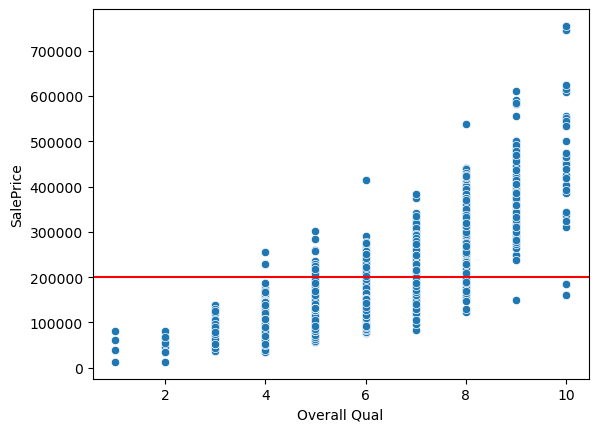

In [7]:
sns.scatterplot(data=df,x="Overall Qual",y="SalePrice")
plt.axhline(y=200000,color="r")

In [8]:
df[(df['Overall Qual']>8) & (df["SalePrice"]<200000)][["SalePrice","Overall Qual"]]

,SalePrice,Overall Qual
1182,150000,9
1498,160000,10
2180,183850,10
2181,184750,10


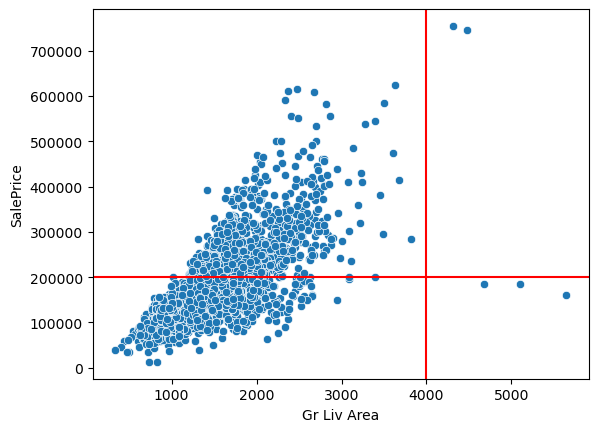

In [9]:
sns.scatterplot(data=df,x="Gr Liv Area",y="SalePrice")
plt.axhline(y=200000,color="r")
plt.axvline(x=4000,color="r")

In [10]:
df[(df['Gr Liv Area']>4000) & (df["SalePrice"]<200000)][["SalePrice","Gr Liv Area"]]

,SalePrice,Gr Liv Area
1498,160000,5642
2180,183850,5095
2181,184750,4676


### removing outliers

In [11]:
index_drop=df[(df['Gr Liv Area']>4000) & (df["SalePrice"]<200000)].index
df=df.drop(index_drop,axis=0)# axis=0 hazfe satr

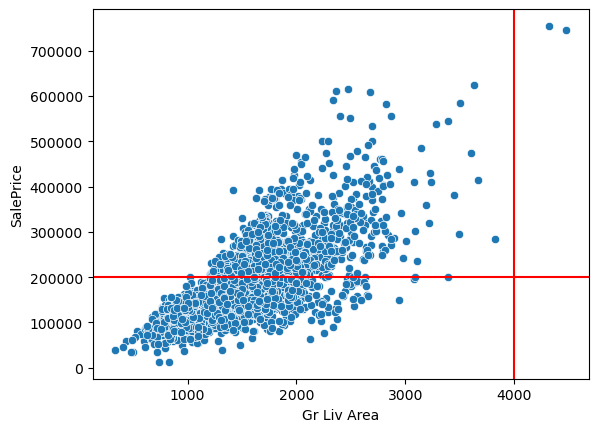

In [12]:
sns.scatterplot(data=df,x="Gr Liv Area",y="SalePrice")
plt.axhline(y=200000,color="r")
plt.axvline(x=4000,color="r")

In [13]:
index_drop2=df[(df['Overall Qual']>8) & (df["SalePrice"]<200000)].index
df=df.drop(index_drop2,axis=0)# axis=0 hazfe satr

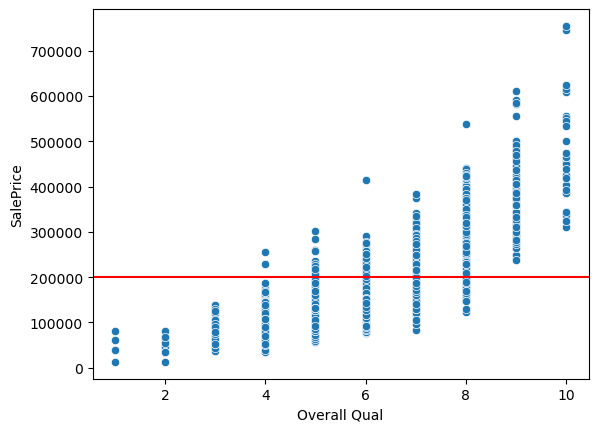

In [14]:
sns.scatterplot(data=df,x="Overall Qual",y="SalePrice")
plt.axhline(y=200000,color="r")

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

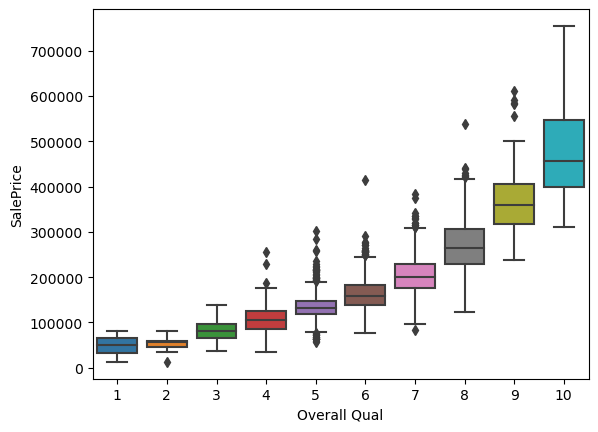

In [15]:
sns.boxplot(x="Overall Qual",y="SalePrice",data=df)

# Dealing with missing data

avalin kari ke bayad bokonid ine ke eshraf peida konid be dataset
kdoma hazf beshn kdoma nashan

# fill/keep/drop???

dataye missing:
1) radifhaiy ke missing daran hazf beshan
2) soton haiy ke missing daran hazf beshn
3) bejaye missing adad bezarim

## how much data is missing ya cheghdr dataye missing darim??

In [16]:
#Import Ames House Dataset
df= pd.read_csv(r"E:\my courses\courses\mine\ai\Machine Learning\machine learning\datasets\preprocess\Housing_Data.csv")

In [17]:
df.isnull()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2926,False,False,False,True,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2927,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [18]:
df.isnull().sum()

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

In [19]:
#darsadi
100*(df.isnull().sum()/len(df))

PID                0.000000
MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.723549
Lot Area           0.000000
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 81, dtype: float64

### making function

In [20]:
def missing_percent(df):
    nan_percent=100*(df.isnull().sum()/len(df))
    nan_percent=nan_percent[nan_percent>0].sort_values()
    return nan_percent
# in tabea dataframe migirad va missing value hara midahad

In [21]:
nan_percent=missing_percent(df)

In [22]:
nan_percent

Electrical         0.034130
Garage Cars        0.034130
BsmtFin SF 1       0.034130
Garage Area        0.034130
BsmtFin SF 2       0.034130
Bsmt Unf SF        0.034130
Total Bsmt SF      0.034130
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
Mas Vnr Area       0.784983
Bsmt Qual          2.730375
Bsmt Cond          2.730375
BsmtFin Type 1     2.730375
BsmtFin Type 2     2.764505
Bsmt Exposure      2.832765
Garage Type        5.358362
Garage Qual        5.426621
Garage Cond        5.426621
Garage Yr Blt      5.426621
Garage Finish      5.426621
Lot Frontage      16.723549
Fireplace Qu      48.532423
Mas Vnr Type      60.580205
Fence             80.477816
Alley             93.242321
Misc Feature      96.382253
Pool QC           99.556314
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'Garage Cars'),
  Text(2, 0, 'BsmtFin SF 1'),
  Text(3, 0, 'Garage Area'),
  Text(4, 0, 'BsmtFin SF 2'),
  Text(5, 0, 'Bsmt Unf SF'),
  Text(6, 0, 'Total Bsmt SF'),
  Text(7, 0, 'Bsmt Half Bath'),
  Text(8, 0, 'Bsmt Full Bath'),
  Text(9, 0, 'Mas Vnr Area'),
  Text(10, 0, 'Bsmt Qual'),
  Text(11, 0, 'Bsmt Cond'),
  Text(12, 0, 'BsmtFin Type 1'),
  Text(13, 0, 'BsmtFin Type 2'),
  Text(14, 0, 'Bsmt Exposure'),
  Text(15, 0, 'Garage Type'),
  Text(16, 0, 'Garage Qual'),
  Text(17, 0, 'Garage Cond'),
  Text(18, 0, 'Garage Yr Blt'),
  Text(19, 0, 'Garage Finish'),
  Text(20, 0, 'Lot Frontage'),
  Text(21, 0, 'Fireplace Qu'),
  Text(22, 0, 'Mas Vnr Type'),
  Text(23, 0, 'Fence'),
  Text(24, 0, 'Alley'),
  Text(25, 0, 'Misc Feature'),
  Text(26, 0, 'Pool QC')])

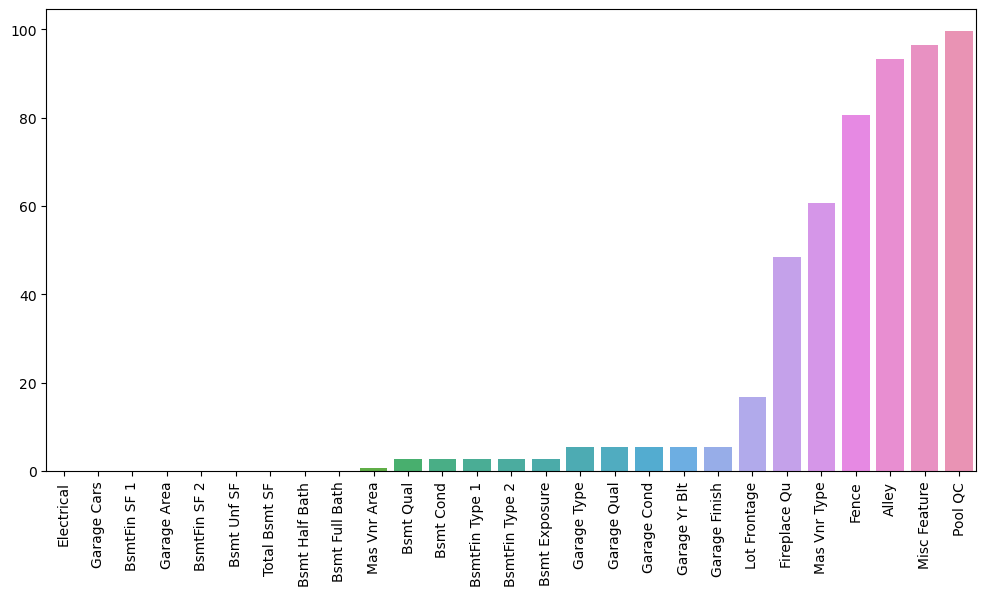

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)

## 2-working on rows missing data

(0.0, 1.0)

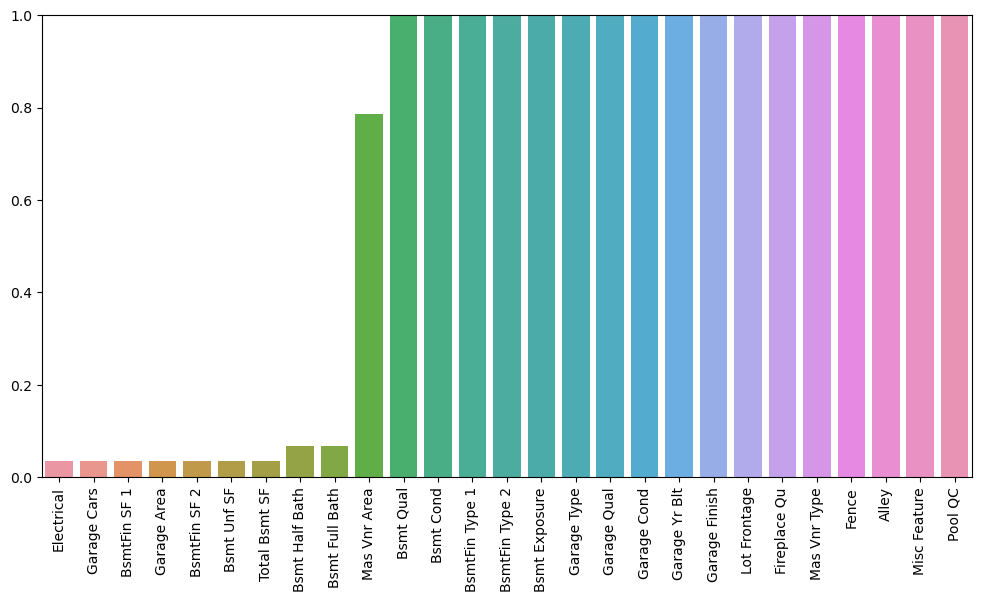

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [25]:
nan_percent[nan_percent<1]

Electrical        0.034130
Garage Cars       0.034130
BsmtFin SF 1      0.034130
Garage Area       0.034130
BsmtFin SF 2      0.034130
Bsmt Unf SF       0.034130
Total Bsmt SF     0.034130
Bsmt Half Bath    0.068259
Bsmt Full Bath    0.068259
Mas Vnr Area      0.784983
dtype: float64

In [30]:
nan_percent[nan_percent<1].index

Index(['Electrical', 'Garage Cars', 'BsmtFin SF 1', 'Garage Area',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Half Bath',
       'Bsmt Full Bath', 'Mas Vnr Area'],
      dtype='object')

In [31]:
df[df['Electrical'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,916386080,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [32]:
df[df['Garage Area'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [33]:
df[df["Mas Vnr Area"].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
55,528240070,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
484,528275160,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,257500
517,528458020,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,New,Partial,225000
538,531371050,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
867,907260030,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,198500
1095,528290090,60,RL,NaN,7750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,176000
1119,528439010,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,247000
1122,528462040,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
1127,528480160,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
1184,534104100,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,205000


# dropping rows

In [36]:
df=df.dropna(axis=0,subset=["Electrical","Garage Area"])

(0.0, 1.0)

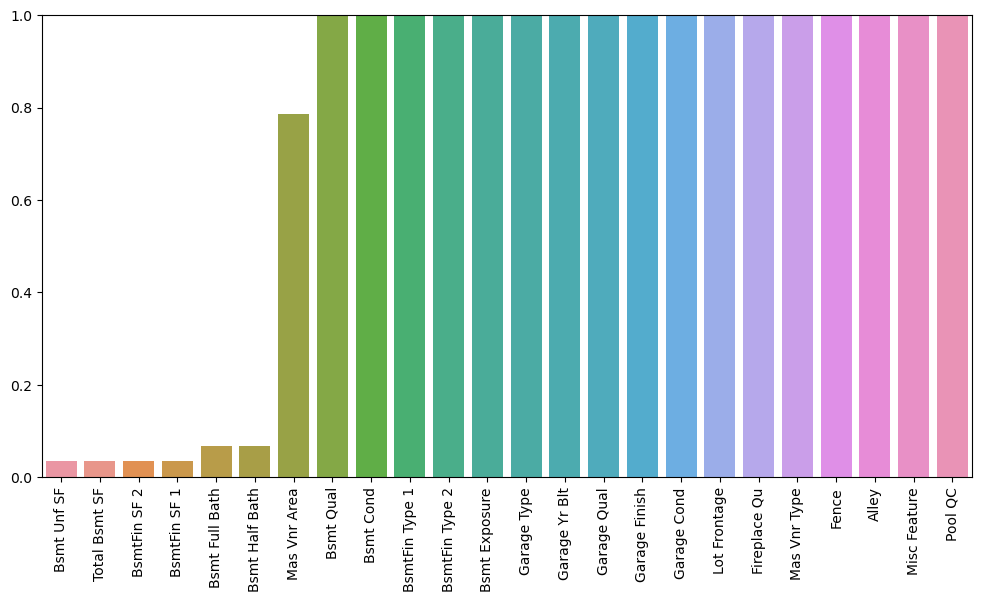

In [45]:
nan_percent=missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [46]:
df[df['Electrical'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [47]:
df[df['BsmtFin SF 1'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [52]:
df[df["Bsmt Half Bath"].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [53]:
df[df["Garage Cars"].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [54]:
df=df.dropna(axis=0,subset=["Bsmt Half Bath"])

In [55]:
df[df['BsmtFin SF 1'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


(0.0, 1.0)

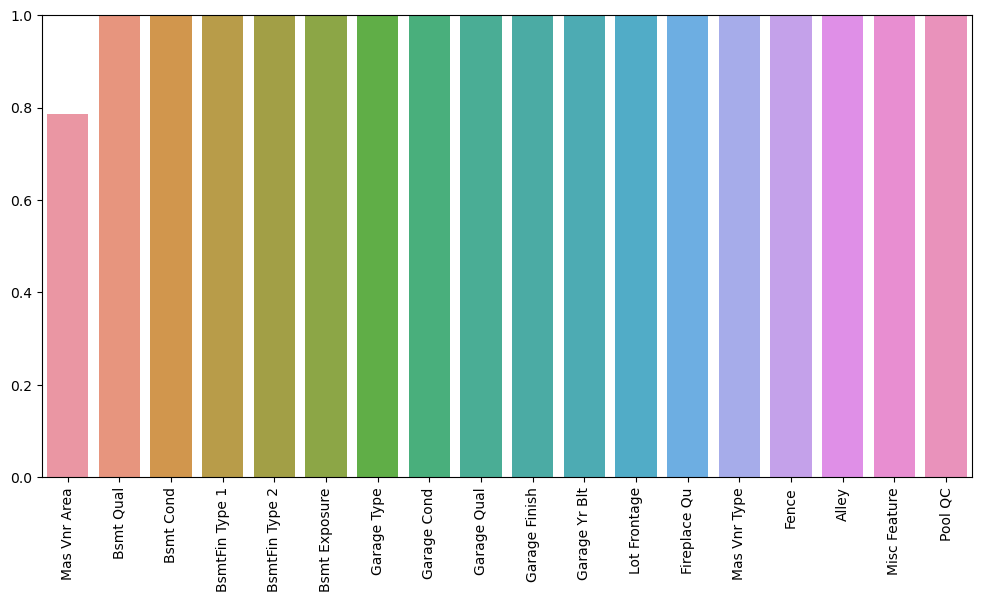

In [56]:
nan_percent=missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [57]:
df[df["Total Bsmt SF"].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [58]:
df[df["Bsmt Half Bath"].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [59]:
df[df["Bsmt Full Bath"].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


Electrical        0.034130
Garage Cars       0.034130
BsmtFin SF 1      0.034130
Garage Area       0.034130
BsmtFin SF 2      0.034130
Bsmt Unf SF       0.034130
Total Bsmt SF     0.034130
Bsmt Half Bath    0.068259
Bsmt Full Bath    0.068259
Mas Vnr Area      0.784983

# fill missing values

In [60]:
# filling with 0
cols1=["BsmtFin SF 1","BsmtFin SF 2","Bsmt Unf SF","Total Bsmt SF","Bsmt Half Bath","Bsmt Full Bath"]
df[cols1]=df[cols1].fillna(0)

(0.0, 1.0)

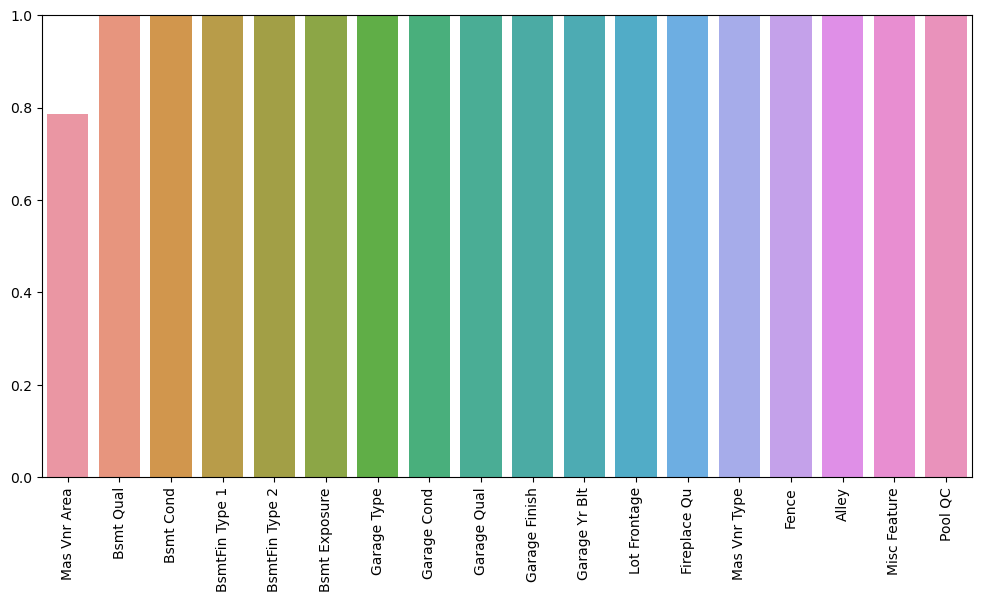

In [61]:
nan_percent=missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [62]:
# filling with 0
cols1=["Bsmt Qual","Bsmt Cond","BsmtFin Type 1","BsmtFin Type 2","Bsmt Exposure"]
df[cols1]=df[cols1].fillna("None")

 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'Garage Cars'),
  Text(2, 0, 'BsmtFin SF 1'),
  Text(3, 0, 'Garage Area'),
  Text(4, 0, 'BsmtFin SF 2'),
  Text(5, 0, 'Bsmt Unf SF'),
  Text(6, 0, 'Total Bsmt SF'),
  Text(7, 0, 'Bsmt Half Bath'),
  Text(8, 0, 'Bsmt Full Bath'),
  Text(9, 0, 'Mas Vnr Area'),
  Text(10, 0, 'Bsmt Qual'),
  Text(11, 0, 'Bsmt Cond'),
  Text(12, 0, 'BsmtFin Type 1'),
  Text(13, 0, 'BsmtFin Type 2'),
  Text(14, 0, 'Bsmt Exposure'),
  Text(15, 0, 'Garage Type'),
  Text(16, 0, 'Garage Qual'),
  Text(17, 0, 'Garage Cond'),
  Text(18, 0, 'Garage Yr Blt'),
  Text(19, 0, 'Garage Finish'),
  Text(20, 0, 'Lot Frontage'),
  Text(21, 0, 'Fireplace Qu'),
  Text(22, 0, 'Mas Vnr Type'),
  Text(23, 0, 'Fence'),
  Text(24, 0, 'Alley'),
  Text(25, 0, 'Misc Feature'),
  Text(26, 0, 'Pool QC')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Mas Vnr Area'),
  Text(1, 0, 'Garage Type'),
  Text(2, 0, 'Garage Yr Blt'),
  Text(3, 0, 'Garage Finish'),
  Text(4, 0, 'Garage Qual'),
  Text(5, 0, 'Garage Cond'),
  Text(6, 0, 'Lot Frontage'),
  Text(7, 0, 'Fireplace Qu'),
  Text(8, 0, 'Mas Vnr Type'),
  Text(9, 0, 'Fence'),
  Text(10, 0, 'Alley'),
  Text(11, 0, 'Misc Feature'),
  Text(12, 0, 'Pool QC')])

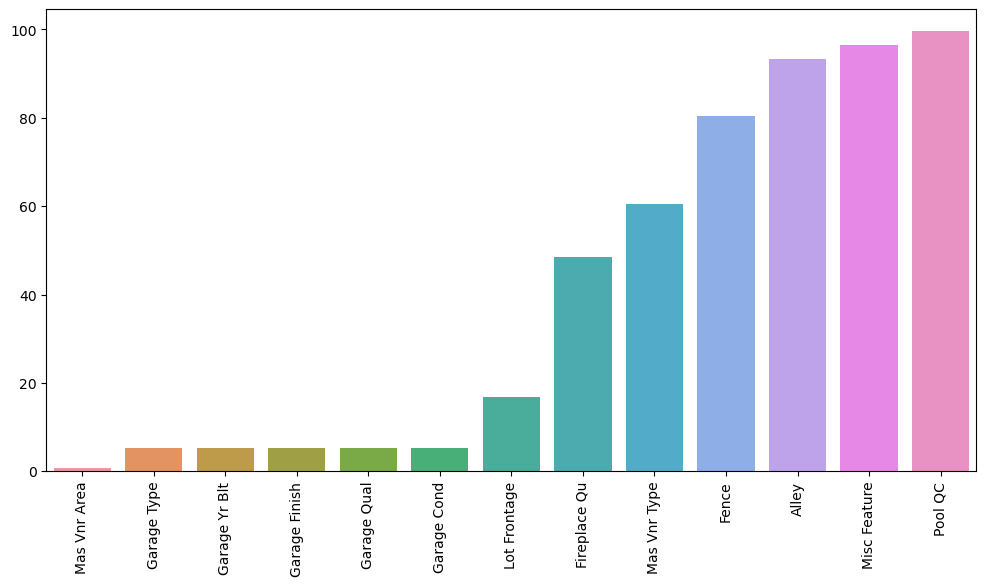

In [63]:
nan_percent=missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)

In [64]:
df["Mas Vnr Area"]=df["Mas Vnr Area"].fillna(0)
df["Mas Vnr Type"]=df["Mas Vnr Type"].fillna("None")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Garage Type'),
  Text(1, 0, 'Garage Yr Blt'),
  Text(2, 0, 'Garage Finish'),
  Text(3, 0, 'Garage Qual'),
  Text(4, 0, 'Garage Cond'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Fireplace Qu'),
  Text(7, 0, 'Fence'),
  Text(8, 0, 'Alley'),
  Text(9, 0, 'Misc Feature'),
  Text(10, 0, 'Pool QC')])

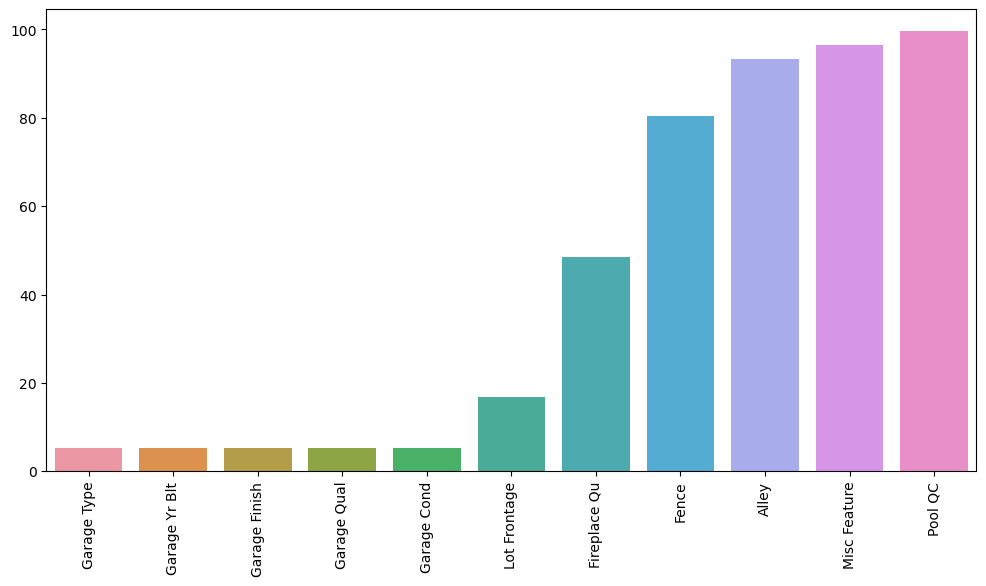

In [65]:
nan_percent=missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)

### Garage columns

In [66]:
df[["Garage Type","Garage Yr Blt","Garage Finish","Garage Qual","Garage Cond"]]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond
0,Attchd,1960.0,Fin,TA,TA
1,Attchd,1961.0,Unf,TA,TA
2,Attchd,1958.0,Unf,TA,TA
3,Attchd,1968.0,Fin,TA,TA
4,Attchd,1997.0,Fin,TA,TA
...,...,...,...,...,...
2925,Detchd,1984.0,Unf,TA,TA
2926,Attchd,1983.0,Unf,TA,TA
2927,NaN,NaN,NaN,NaN,NaN
2928,Attchd,1975.0,RFn,TA,TA


In [67]:
Gar_cols=["Garage Type","Garage Finish","Garage Qual","Garage Cond"]
df[Gar_cols]=df[Gar_cols].fillna("None")

df["Garage Yr Blt"]=df["Garage Yr Blt"].fillna(0)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Lot Frontage'),
  Text(1, 0, 'Fireplace Qu'),
  Text(2, 0, 'Fence'),
  Text(3, 0, 'Alley'),
  Text(4, 0, 'Misc Feature'),
  Text(5, 0, 'Pool QC')])

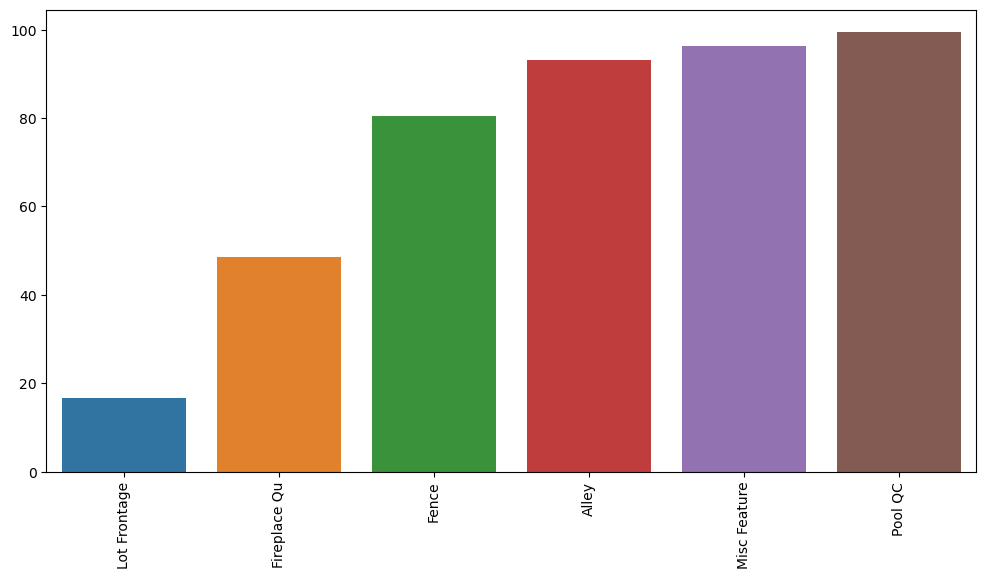

In [68]:
nan_percent=missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)

In [69]:
nan_percent.index

Index(['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

In [70]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2925,37.0,NaN,GdPrv,NaN,NaN,NaN
2926,NaN,NaN,MnPrv,NaN,NaN,NaN
2927,62.0,NaN,MnPrv,NaN,Shed,NaN
2928,77.0,TA,NaN,NaN,NaN,NaN


In [71]:
df=df.drop(["Fence","Alley","Misc Feature","Pool QC"],axis=1)

(array([0, 1]), [Text(0, 0, 'Lot Frontage'), Text(1, 0, 'Fireplace Qu')])

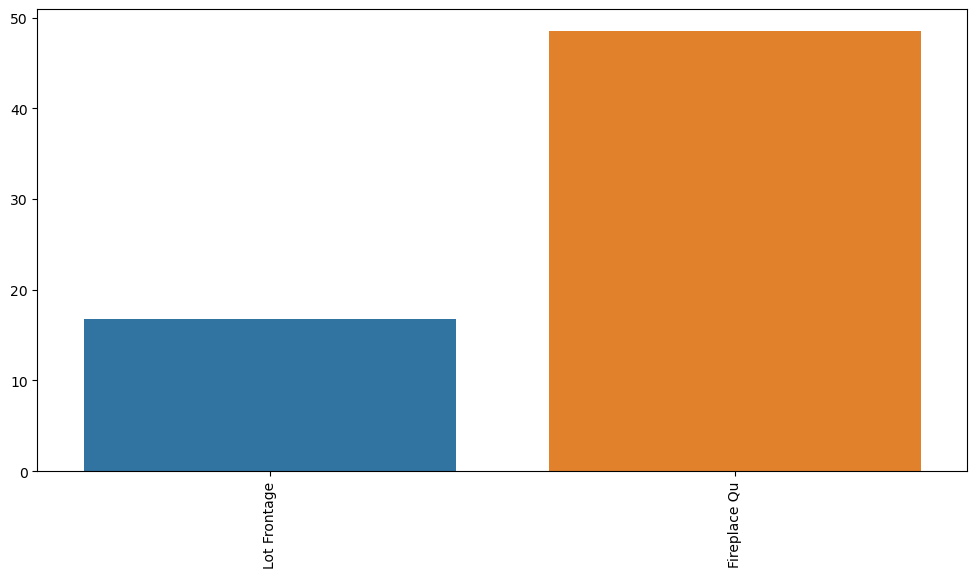

In [72]:
nan_percent=missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)

In [73]:
df["Fireplace Qu"]=df["Fireplace Qu"].fillna("None")

(array([0]), [Text(0, 0, 'Lot Frontage')])

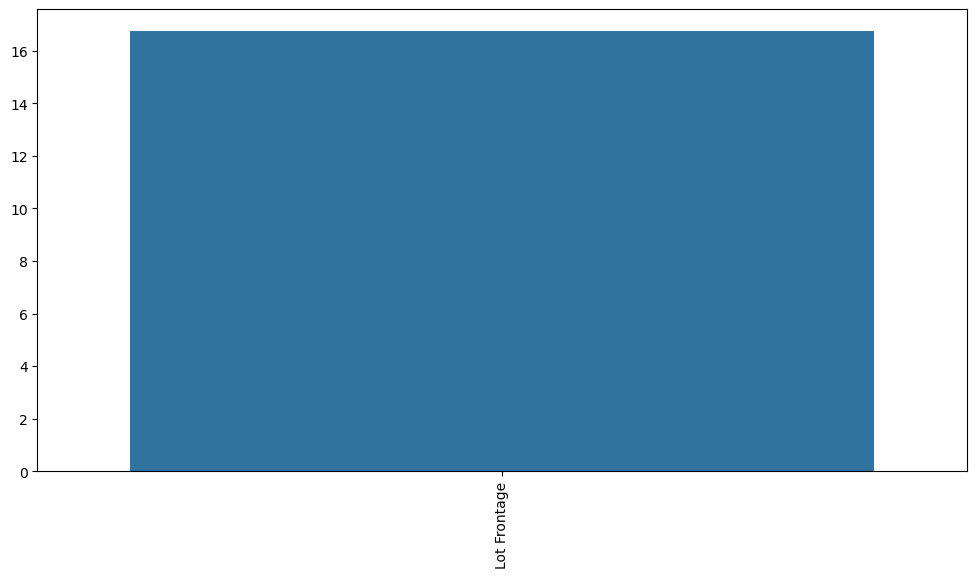

In [74]:
nan_percent=missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)

# Imputation of missing data

In [75]:
df['Neighborhood'].unique()#

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

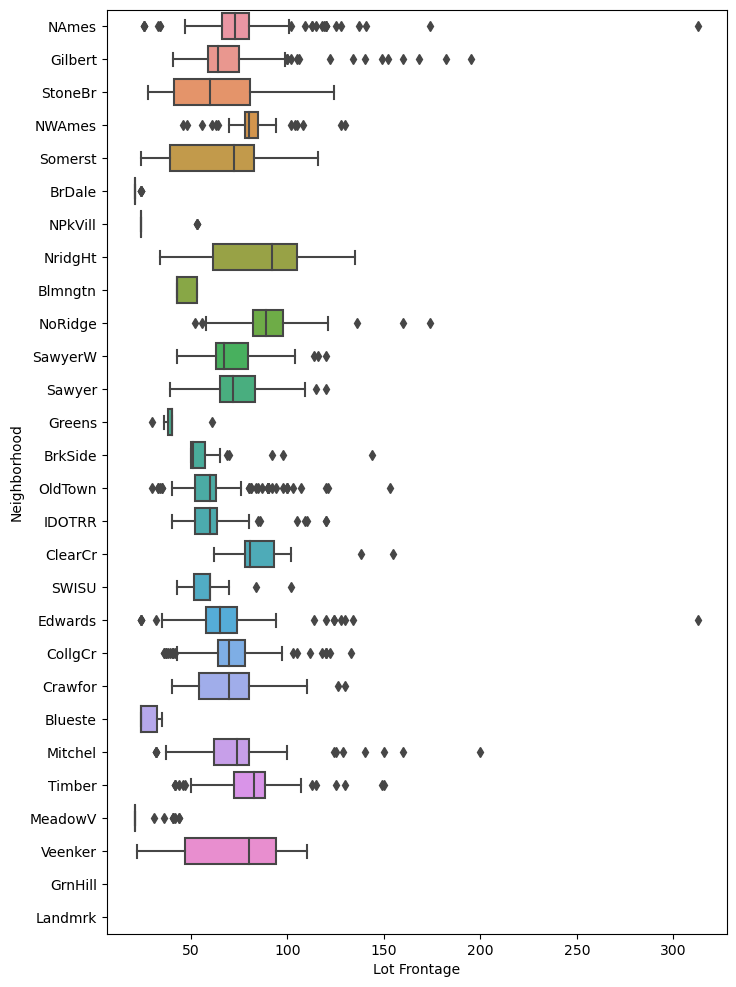

In [76]:
plt.figure(figsize=(8,12))
sns.boxplot(data=df,x="Lot Frontage",y="Neighborhood")

In [ ]:
# imputing missing data based on other columns==> yani gharar dadn adad dar missing has bar asase soton haye dgar

In [77]:
df.groupby("Neighborhood")["Lot Frontage"]

In [78]:
df.groupby("Neighborhood")["Lot Frontage"].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.329787
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    66.593220
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [79]:
df.groupby("Neighborhood")["Lot Frontage"].transform(lambda val: val.fillna(val.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2925     37.000000
2926     75.144444
2927     62.000000
2928     77.000000
2929     74.000000
Name: Lot Frontage, Length: 2926, dtype: float64

In [81]:
df["Lot Frontage"]=df.groupby("Neighborhood")["Lot Frontage"].transform(lambda val: val.fillna(val.mean()))

(array([0]), [Text(0, 0, 'Lot Frontage')])

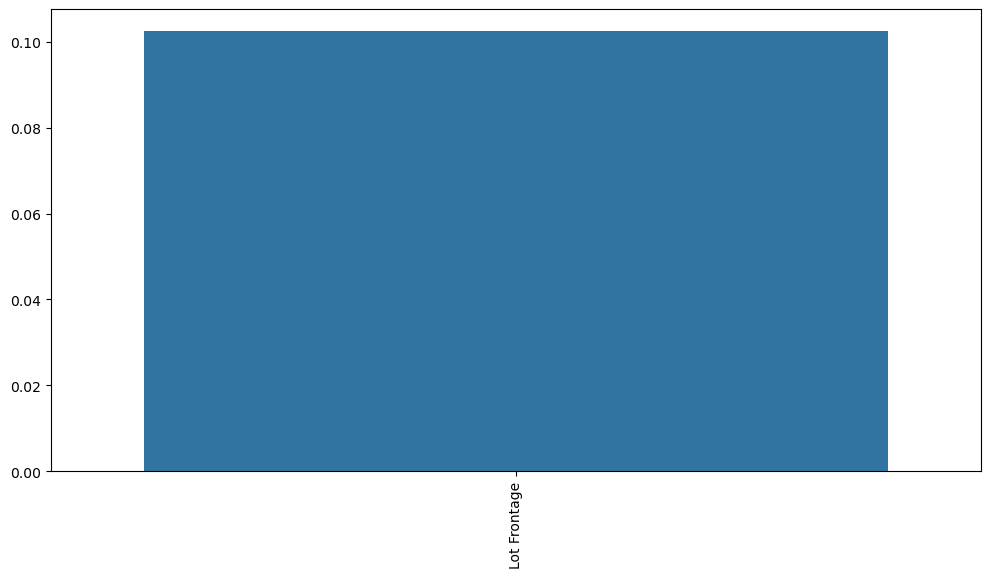

In [82]:
nan_percent=missing_percent(df)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)

In [83]:
df["Lot Frontage"]=df["Lot Frontage"].fillna(0)

In [85]:
nan_percent=missing_percent(df)

In [86]:
nan_percent

Series([], dtype: float64)

# Dealing with categorical data

## 1- numerical coulmns to categorical

In [87]:
df["MS SubClass"]

0       20
1       20
2       20
3       20
4       60
        ..
2925    80
2926    20
2927    85
2928    20
2929    60
Name: MS SubClass, Length: 2926, dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2926 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2926 non-null   int64  
 1   MS SubClass      2926 non-null   int64  
 2   MS Zoning        2926 non-null   object 
 3   Lot Frontage     2926 non-null   float64
 4   Lot Area         2926 non-null   int64  
 5   Street           2926 non-null   object 
 6   Lot Shape        2926 non-null   object 
 7   Land Contour     2926 non-null   object 
 8   Utilities        2926 non-null   object 
 9   Lot Config       2926 non-null   object 
 10  Land Slope       2926 non-null   object 
 11  Neighborhood     2926 non-null   object 
 12  Condition 1      2926 non-null   object 
 13  Condition 2      2926 non-null   object 
 14  Bldg Type        2926 non-null   object 
 15  House Style      2926 non-null   object 
 16  Overall Qual     2926 non-null   int64  
 17  Overall Cond     29

In [89]:
# pid ra hazf kon
df=df.drop("PID",axis=1)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2926 entries, 0 to 2929
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2926 non-null   int64  
 1   MS Zoning        2926 non-null   object 
 2   Lot Frontage     2926 non-null   float64
 3   Lot Area         2926 non-null   int64  
 4   Street           2926 non-null   object 
 5   Lot Shape        2926 non-null   object 
 6   Land Contour     2926 non-null   object 
 7   Utilities        2926 non-null   object 
 8   Lot Config       2926 non-null   object 
 9   Land Slope       2926 non-null   object 
 10  Neighborhood     2926 non-null   object 
 11  Condition 1      2926 non-null   object 
 12  Condition 2      2926 non-null   object 
 13  Bldg Type        2926 non-null   object 
 14  House Style      2926 non-null   object 
 15  Overall Qual     2926 non-null   int64  
 16  Overall Cond     2926 non-null   int64  
 17  Year Built       29

In [91]:
df["MS SubClass"].unique()

array([ 20,  60, 120,  50,  85, 160,  80,  30,  90, 190,  45,  70,  75,
        40, 180, 150], dtype=int64)

In [92]:
df["MS SubClass"]=df["MS SubClass"].apply(str)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2926 entries, 0 to 2929
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2926 non-null   object 
 1   MS Zoning        2926 non-null   object 
 2   Lot Frontage     2926 non-null   float64
 3   Lot Area         2926 non-null   int64  
 4   Street           2926 non-null   object 
 5   Lot Shape        2926 non-null   object 
 6   Land Contour     2926 non-null   object 
 7   Utilities        2926 non-null   object 
 8   Lot Config       2926 non-null   object 
 9   Land Slope       2926 non-null   object 
 10  Neighborhood     2926 non-null   object 
 11  Condition 1      2926 non-null   object 
 12  Condition 2      2926 non-null   object 
 13  Bldg Type        2926 non-null   object 
 14  House Style      2926 non-null   object 
 15  Overall Qual     2926 non-null   int64  
 16  Overall Cond     2926 non-null   int64  
 17  Year Built       29

In [94]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


## 2-Creating dummy variables

In [95]:
df.select_dtypes(include="object")

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2926,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2927,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2928,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [97]:
df_num=df.select_dtypes(exclude="object")
df_obj=df.select_dtypes(include="object")

In [98]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2926 entries, 0 to 2929
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2926 non-null   float64
 1   Lot Area         2926 non-null   int64  
 2   Overall Qual     2926 non-null   int64  
 3   Overall Cond     2926 non-null   int64  
 4   Year Built       2926 non-null   int64  
 5   Year Remod/Add   2926 non-null   int64  
 6   Mas Vnr Area     2926 non-null   float64
 7   BsmtFin SF 1     2926 non-null   float64
 8   BsmtFin SF 2     2926 non-null   float64
 9   Bsmt Unf SF      2926 non-null   float64
 10  Total Bsmt SF    2926 non-null   float64
 11  1st Flr SF       2926 non-null   int64  
 12  2nd Flr SF       2926 non-null   int64  
 13  Low Qual Fin SF  2926 non-null   int64  
 14  Gr Liv Area      2926 non-null   int64  
 15  Bsmt Full Bath   2926 non-null   float64
 16  Bsmt Half Bath   2926 non-null   float64
 17  Full Bath        29

In [99]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2926 entries, 0 to 2929
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2926 non-null   object
 1   MS Zoning       2926 non-null   object
 2   Street          2926 non-null   object
 3   Lot Shape       2926 non-null   object
 4   Land Contour    2926 non-null   object
 5   Utilities       2926 non-null   object
 6   Lot Config      2926 non-null   object
 7   Land Slope      2926 non-null   object
 8   Neighborhood    2926 non-null   object
 9   Condition 1     2926 non-null   object
 10  Condition 2     2926 non-null   object
 11  Bldg Type       2926 non-null   object
 12  House Style     2926 non-null   object
 13  Roof Style      2926 non-null   object
 14  Roof Matl       2926 non-null   object
 15  Exterior 1st    2926 non-null   object
 16  Exterior 2nd    2926 non-null   object
 17  Mas Vnr Type    2926 non-null   object
 18  Exter Qual   

In [103]:
# converting ya tabdil
df_obj=pd.get_dummies(df_obj,drop_first=True)

In [104]:
df_obj.shape

(2926, 239)

In [105]:
final_df=pd.concat([df_num,df_obj],axis=1)

In [106]:
final_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,False,False,False,False,True,False,False,False,True,False
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,False,False,False,False,True,False,False,False,True,False
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,False,False,False,False,True,False,False,False,True,False
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,False,False,False,False,True,False,False,False,True,False
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,False,False,False,False,True,False,False,False,True,False
